<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Spring 20 midterm, Section 7</div>
<div style="text-align: right">Dino Konstantopoulos, 26 February 2020</div>
<div style="text-align: right">100 points total</div>

# INFO 6105 Spring 20 Midterm

You have up to an hour. There is a *lot* of coding in this midterm. It is meant to simulate a real interview so you are *pressed for time*. Be mindful what you spend your time working on. Good luck!

>**NO CHEATING**: If you cheat by emailing or messaging during the midterm (and we can see you from behind), we will close your laptop and ask you to leave in front of everyone, you *will* get an F for the midterm, and have a nice little chat with director Kal. You are only allowed to browse, not to communicate in any shape or form, via email, messaging, or posting. Also, you are not allowed to post or share this midterm with anyone, not now, nor in the future. The other section is taking the midterm *after* spring break.

<div style="text-align: right">50 points</div>

# 1. Blackjack

[Blackjack](https://en.wikipedia.org/wiki/Blackjack) is the American version of a popular global banking game known as **Twenty-One**, whose relatives include *Pontoon* and *Vingt-et-Un*. It is a comparing card game between one or more players and a dealer, where each player in turn competes against the dealer. Players do not compete against each other, they compete against the dealer. It is played with one or more decks of 52 cards, and is the *most widely played casino banking game in the world*.

<br />
<center>
<img src = ipynb.images/bj.jpg width = 500 />
</center>

Players are each dealt two cards, face up or down depending on the casino and the table. In the U.S., the dealer is also dealt two cards, normally one up (exposed) and one down (hidden). In most other countries, the dealer only receives one card face up. The value of cards two through ten is their pip value (2 through 10). Face cards (Jack, Queen, and King) are all worth ten. Aces can be worth one *or* eleven. A hand's value is the sum of the card values. Players are allowed to draw additional cards to improve their hands. A hand with an ace valued as 11 is called "*soft*", meaning that the hand will not bust by taking an additional card. The value of the ace will become one to prevent the hand from exceeding 21.

<br />
<center>
<img src = ipynb.images/bj.webp width = 300 />
</center>

Once all the players have completed their hands, it is the dealer's turn. The dealer hand will not be completed if all players have either busted or received *blackjacks* (=21). The dealer then reveals the hidden card and must hit (draw another card) until the cards total up to 17 points. At 17 points or higher the dealer *must* stay (at most tables the dealer also hits on a "*soft*" 17, i.e. a hand containing an ace and one or more other cards totaling six). You are betting that you have a better hand than the dealer. The better hand is the hand where the sum of the card values is closer to 21 without exceeding 21. The detailed outcome of the hand follows:

- If the player is dealt an Ace and a ten-value card (called a "*blackjack*" or "*natural*"), and the dealer does not, the player wins and usually receives a bonus.
- If the player exceeds a sum of 21 ("*busts*"); the player loses, even if the dealer also exceeds 21.
- If the dealer exceeds 21 ("*busts*") and the player does not; the player wins.
- If the player attains a final sum higher than the dealer and does not bust; the player wins.
- If both dealer and player receive a blackjack or any other hands with the same sum, called a "*push*", *no one* wins.

Here's a game of blackjack in code:

In [1]:
from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(deck):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random() * len(deck))
        
        # Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
        
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        #user_input = raw_input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        user_input = choice(['y', 'n'])
        
    print ("Your score is: %d" % calculate_score(table_cards))
    
    # Return the round total score
    return calculate_score(table_cards)


def game():
    # Define an empty deck
    deck = []
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['player 1', 'player 2']

    max_score = 0
    winner = None

    # I will run the game one time per player
    for player in players:
        print ("\n%s, your turn starts now!\n" % player)
        score = play_turn(deck)
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        if 21 >= score > max_score:
            max_score = score
            winner = player

    print ("Winner is %s" % winner)


if __name__ == "__main__":
    game()


player 1, your turn starts now!

('4', 'diamonds')
('3', 'diamonds')
('A', 'diamonds')
('8', 'heart')
Your score is: 26

player 2, your turn starts now!

('Q', 'heart')
Your score is: 10
Winner is player 2


Go ahead, play a game of blackjack:

### Question 1
Now, *modify* the code above to follow the *american* rules of blackjack described above, so that player 1 is **you** and player 2 is the **dealer**. You have to modify the code *above*, not any other package.

### Question 2
*Then*, adopt this simple strategy:
- If your hand ≥ 18, 'stick' with a probability of 80%, else 'hit' with a probability of 80%. 

This isn’t an amazing policy but it is simple and you will still be able to win some games. Now, do a Monte Carlo simulation of this strategy and figure out its winning **Expectation** (by playing through thousands of games).

### Question 3
Now let's say that you want to know the value of holding a hand of 15 while the dealer is showing, let's say, a 10. This is an example of a **prediction** problem. Each time the agent carries out action A in state S for the first time in that game, it will calculate the reward of the game from that point onwards. By doing this, you can determine how valuable it is to be in that current state.

Suppose you run this Monte Carlo simulation many times and you come up with the followind strategy table:

<br />
<center>
<img src = ipynb.images/strategy.png width = 500 />
</center>

Now *implement* this strategy in code, run a Monte Carlo simulation, and compare the winning percentage with the previous strategy. `S` is **stick** (*no more cards, please*), `H` is **hit** (*please give me another card Mr. Dealer*), and assume `D` is **hit** as well. Which is a better strategy and by how much?

### Question 1 Player and Dealer

In [2]:
from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(deck):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random() * len(deck))
        
        # Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
        
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        #user_input = raw_input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        user_input = choice(['y', 'n'])
        
    print ("Your score is: %d" % calculate_score(table_cards))
    
    # Return the round total score
    return calculate_score(table_cards)


def game():
    # Define an empty deck
    deck = []
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['Aelina', 'Dealer']

    max_score = 0
    winner = None

    # I will run the game one time per player
    for player in players:
        print ("\n%s, your turn starts now!\n" % player)
        score = play_turn(deck)
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        if 21 >= score > max_score:
            max_score = score
            winner = player

    print ("Winner is %s" % winner)


if __name__ == "__main__":
    game()


Aelina, your turn starts now!

('9', 'heart')
('9', 'clubs')
('A', 'spades')
Your score is: 19

Dealer, your turn starts now!

('2', 'heart')
Your score is: 2
Winner is Aelina


### Monte Carlo Predictions without External Pakages

In [1]:
from random import random
from random import choice
from numpy.random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(deck, category='player'):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        #Calculate random card position
        position = int(random() * len(deck))
        
        #Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
        
        #Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        # user_input = raw_input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        # user_input = choice(['y', 'n'])
        user_input_list = ['y','n']
        if (calculate_score(table_cards) >= 18):
            draw = choice(user_input_list, 1,
              p=[0.2,0.8])
        else:
            draw = choice(user_input_list, 1,
              p=[0.8,0.2])
        
        user_input = draw[0]
        
    if category == 'player': print ("Player score is: %d" % calculate_score(table_cards))
    else: print("Dealer score is: %d" % calculate_score(table_cards))    
    
    # Return the round total score
    return calculate_score(table_cards)


def game():
    # Define an empty deck
    deck = []
    
    #Populate the deck with all the 52 cards
    #For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    #Calculate the dealer score
    print('Dealer turn starts now')
    dealer_score = play_turn(deck,'dealer')

    
    #Create a list of players, in this case 2 players will play
    #players = ['player 1'] DEL LATER

    max_score = 0
    winner = 'Dealer'
    #run the game one time per player
    #for player in players:
    #print ("\n%s, your turn starts now!" % player)
    print('Player turn starts now')
    score = play_turn(deck)
    #We check who is winning the match, if the current player score is above previous highest,
    #he is the new winner
    if 21 >= score > dealer_score:
        max_score = score
        winner = 'Player'
    if dealer_score > 21 and score<21 : winner = 'Player'
        
    if not dealer_score == score :     
        print ("Winner is %s" % winner)
        if winner == 'Dealer': return 'd'
        elif winner == 'Player': return 'p'
    else:
        print("It is a push, no one wins")
        return 'push'

In [2]:
game()

Dealer turn starts now
('5', 'spades')
('3', 'heart')
('6', 'diamonds')
('3', 'spades')
('J', 'spades')
Dealer score is: 27
Player turn starts now
('J', 'diamonds')
('10', 'clubs')
Player score is: 20
Winner is Player


'p'

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090460

In [4]:
game_list = []

for i in range(1000):
    game_list.append(game())

Dealer turn starts now
('6', 'diamonds')
('8', 'clubs')
('6', 'spades')
Dealer score is: 20
Player turn starts now
('8', 'spades')
('5', 'spades')
Player score is: 13
Winner is Dealer
Dealer turn starts now
('Q', 'heart')
('5', 'clubs')
('7', 'diamonds')
Dealer score is: 22
Player turn starts now
('10', 'diamonds')
Player score is: 10
Winner is Player
Dealer turn starts now
('4', 'spades')
Dealer score is: 4
Player turn starts now
('7', 'heart')
('4', 'diamonds')
('Q', 'clubs')
Player score is: 21
Winner is Player
Dealer turn starts now
('6', 'diamonds')
Dealer score is: 6
Player turn starts now
('10', 'clubs')
('Q', 'clubs')
('5', 'diamonds')
Player score is: 25
Winner is Dealer
Dealer turn starts now
('9', 'spades')
('9', 'clubs')
Dealer score is: 18
Player turn starts now
('6', 'diamonds')
('9', 'heart')
('9', 'diamonds')
Player score is: 24
Winner is Dealer
Dealer turn starts now
('J', 'heart')
Dealer score is: 10
Player turn starts now
('2', 'clubs')
('2', 'diamonds')
('K', 'diamo

('A', 'clubs')
('9', 'diamonds')
Dealer score is: 27
Player turn starts now
('J', 'heart')
('K', 'spades')
Player score is: 20
Winner is Player
Dealer turn starts now
('8', 'heart')
('3', 'spades')
('10', 'diamonds')
Dealer score is: 21
Player turn starts now
('A', 'spades')
Player score is: 11
Winner is Dealer
Dealer turn starts now
('9', 'heart')
('A', 'diamonds')
Dealer score is: 20
Player turn starts now
('K', 'clubs')
('Q', 'heart')
Player score is: 20
It is a push, no one wins
Dealer turn starts now
('A', 'diamonds')
('J', 'spades')
Dealer score is: 21
Player turn starts now
('3', 'clubs')
('K', 'clubs')
('6', 'spades')
('J', 'heart')
Player score is: 29
Winner is Dealer
Dealer turn starts now
('A', 'diamonds')
Dealer score is: 11
Player turn starts now
('3', 'spades')
('K', 'diamonds')
('J', 'heart')
Player score is: 23
Winner is Dealer
Dealer turn starts now
('5', 'spades')
Dealer score is: 5
Player turn starts now
('10', 'spades')
Player score is: 10
Winner is Player
Dealer tu

Player score is: 18
Winner is Dealer
Dealer turn starts now
('Q', 'diamonds')
('4', 'heart')
Dealer score is: 14
Player turn starts now
('5', 'spades')
('6', 'heart')
Player score is: 11
Winner is Dealer
Dealer turn starts now
('7', 'heart')
('10', 'clubs')
('3', 'clubs')
Dealer score is: 20
Player turn starts now
('8', 'heart')
('3', 'diamonds')
('J', 'clubs')
Player score is: 21
Winner is Player
Dealer turn starts now
('8', 'diamonds')
Dealer score is: 8
Player turn starts now
('J', 'clubs')
('7', 'clubs')
('4', 'diamonds')
Player score is: 21
Winner is Player
Dealer turn starts now
('4', 'spades')
('7', 'heart')
('10', 'diamonds')
Dealer score is: 21
Player turn starts now
('6', 'clubs')
Player score is: 6
Winner is Dealer
Dealer turn starts now
('4', 'spades')
('K', 'clubs')
('4', 'clubs')
Dealer score is: 18
Player turn starts now
('J', 'heart')
('7', 'clubs')
('6', 'diamonds')
Player score is: 23
Winner is Dealer
Dealer turn starts now
('2', 'spades')
('3', 'diamonds')
('7', 'dia

('A', 'diamonds')
Dealer score is: 21
Player turn starts now
('7', 'clubs')
('4', 'diamonds')
Player score is: 11
Winner is Dealer
Dealer turn starts now
('7', 'clubs')
('J', 'spades')
('8', 'clubs')
Dealer score is: 25
Player turn starts now
('A', 'diamonds')
('A', 'clubs')
('2', 'diamonds')
('K', 'diamonds')
Player score is: 24
Winner is Dealer
Dealer turn starts now
('8', 'diamonds')
('7', 'spades')
('6', 'clubs')
Dealer score is: 21
Player turn starts now
('2', 'diamonds')
Player score is: 2
Winner is Dealer
Dealer turn starts now
('3', 'spades')
('3', 'diamonds')
('8', 'diamonds')
Dealer score is: 14
Player turn starts now
('6', 'heart')
Player score is: 6
Winner is Dealer
Dealer turn starts now
('3', 'spades')
('3', 'diamonds')
('J', 'diamonds')
('K', 'spades')
Dealer score is: 26
Player turn starts now
('Q', 'spades')
Player score is: 10
Winner is Player
Dealer turn starts now
('J', 'heart')
Dealer score is: 10
Player turn starts now
('K', 'diamonds')
('6', 'diamonds')
('4', 'di

Winner is Player
Dealer turn starts now
('9', 'heart')
('4', 'clubs')
('K', 'diamonds')
Dealer score is: 23
Player turn starts now
('4', 'diamonds')
('4', 'spades')
('K', 'heart')
Player score is: 18
Winner is Player
Dealer turn starts now
('J', 'spades')
('2', 'heart')
Dealer score is: 12
Player turn starts now
('2', 'diamonds')
('10', 'diamonds')
('10', 'spades')
Player score is: 22
Winner is Dealer
Dealer turn starts now
('J', 'spades')
('10', 'clubs')
('5', 'diamonds')
Dealer score is: 25
Player turn starts now
('3', 'clubs')
('6', 'diamonds')
('5', 'spades')
('8', 'heart')
Player score is: 22
Winner is Dealer
Dealer turn starts now
('4', 'clubs')
('4', 'heart')
('5', 'diamonds')
('3', 'spades')
('10', 'spades')
Dealer score is: 26
Player turn starts now
('K', 'heart')
('4', 'diamonds')
('10', 'heart')
Player score is: 24
Winner is Dealer
Dealer turn starts now
('6', 'heart')
('K', 'clubs')
('J', 'diamonds')
Dealer score is: 26
Player turn starts now
('7', 'heart')
('7', 'clubs')
(

Player score is: 7
Winner is Dealer
Dealer turn starts now
('5', 'clubs')
Dealer score is: 5
Player turn starts now
('3', 'diamonds')
('3', 'clubs')
('A', 'diamonds')
('9', 'spades')
Player score is: 26
Winner is Dealer
Dealer turn starts now
('2', 'clubs')
Dealer score is: 2
Player turn starts now
('J', 'clubs')
('4', 'diamonds')
('7', 'clubs')
Player score is: 21
Winner is Player
Dealer turn starts now
('J', 'diamonds')
Dealer score is: 10
Player turn starts now
('6', 'diamonds')
('Q', 'clubs')
('7', 'clubs')
Player score is: 23
Winner is Dealer
Dealer turn starts now
('8', 'clubs')
('3', 'heart')
('10', 'diamonds')
Dealer score is: 21
Player turn starts now
('2', 'diamonds')
('A', 'diamonds')
Player score is: 13
Winner is Dealer
Dealer turn starts now
('2', 'spades')
('K', 'spades')
('K', 'diamonds')
Dealer score is: 22
Player turn starts now
('3', 'clubs')
('7', 'heart')
('7', 'clubs')
('9', 'spades')
Player score is: 26
Winner is Dealer
Dealer turn starts now
('6', 'heart')
('2', 

Player turn starts now
('9', 'clubs')
('3', 'spades')
('J', 'spades')
Player score is: 22
Winner is Dealer
Dealer turn starts now
('J', 'diamonds')
Dealer score is: 10
Player turn starts now
('8', 'clubs')
Player score is: 8
Winner is Dealer
Dealer turn starts now
('9', 'clubs')
('4', 'heart')
('2', 'heart')
('6', 'diamonds')
Dealer score is: 21
Player turn starts now
('2', 'clubs')
('2', 'spades')
('8', 'clubs')
Player score is: 12
Winner is Dealer
Dealer turn starts now
('K', 'diamonds')
('Q', 'clubs')
Dealer score is: 20
Player turn starts now
('3', 'spades')
('4', 'diamonds')
Player score is: 7
Winner is Dealer
Dealer turn starts now
('9', 'diamonds')
Dealer score is: 9
Player turn starts now
('A', 'heart')
('9', 'heart')
Player score is: 20
Winner is Player
Dealer turn starts now
('5', 'heart')
('2', 'diamonds')
('8', 'spades')
('3', 'spades')
Dealer score is: 18
Player turn starts now
('10', 'spades')
('Q', 'spades')
Player score is: 20
Winner is Player
Dealer turn starts now
('7

('5', 'clubs')
('6', 'heart')
('K', 'clubs')
Dealer score is: 21
Player turn starts now
('4', 'heart')
('3', 'spades')
Player score is: 7
Winner is Dealer
Dealer turn starts now
('8', 'heart')
('Q', 'spades')
('Q', 'diamonds')
Dealer score is: 28
Player turn starts now
('10', 'diamonds')
Player score is: 10
Winner is Player
Dealer turn starts now
('5', 'diamonds')
('7', 'spades')
('8', 'heart')
Dealer score is: 20
Player turn starts now
('A', 'clubs')
('J', 'heart')
Player score is: 21
Winner is Player
Dealer turn starts now
('3', 'spades')
('3', 'diamonds')
Dealer score is: 6
Player turn starts now
('K', 'diamonds')
('5', 'clubs')
('J', 'heart')
Player score is: 25
Winner is Dealer
Dealer turn starts now
('4', 'spades')
('K', 'spades')
('A', 'heart')
('A', 'clubs')
('5', 'spades')
Dealer score is: 21
Player turn starts now
('9', 'diamonds')
('4', 'diamonds')
('2', 'diamonds')
('3', 'heart')
('Q', 'diamonds')
Player score is: 28
Winner is Dealer
Dealer turn starts now
('5', 'spades')
D

('4', 'spades')
('2', 'clubs')
('5', 'clubs')
('J', 'clubs')
Dealer score is: 21
Player turn starts now
('10', 'heart')
('8', 'clubs')
Player score is: 18
Winner is Dealer
Dealer turn starts now
('8', 'heart')
('6', 'spades')
('J', 'heart')
Dealer score is: 24
Player turn starts now
('4', 'clubs')
('8', 'diamonds')
Player score is: 12
Winner is Player
Dealer turn starts now
('8', 'diamonds')
('5', 'spades')
('7', 'spades')
Dealer score is: 20
Player turn starts now
('5', 'heart')
('4', 'clubs')
('K', 'diamonds')
Player score is: 19
Winner is Dealer
Dealer turn starts now
('A', 'heart')
('7', 'clubs')
('J', 'spades')
Dealer score is: 28
Player turn starts now
('6', 'spades')
('10', 'clubs')
('3', 'spades')
Player score is: 19
Winner is Player
Dealer turn starts now
('9', 'clubs')
('J', 'diamonds')
Dealer score is: 19
Player turn starts now
('4', 'diamonds')
('A', 'heart')
('10', 'spades')
Player score is: 25
Winner is Dealer
Dealer turn starts now
('J', 'spades')
('4', 'diamonds')
('A',

Dealer score is: 18
Player turn starts now
('A', 'diamonds')
('Q', 'diamonds')
Player score is: 21
Winner is Player
Dealer turn starts now
('K', 'spades')
('7', 'heart')
('J', 'spades')
Dealer score is: 27
Player turn starts now
('Q', 'heart')
('7', 'diamonds')
('8', 'clubs')
Player score is: 25
Winner is Dealer
Dealer turn starts now
('J', 'heart')
('K', 'diamonds')
Dealer score is: 20
Player turn starts now
('K', 'heart')
('2', 'diamonds')
('2', 'clubs')
('A', 'clubs')
Player score is: 15
Winner is Dealer
Dealer turn starts now
('J', 'spades')
('7', 'spades')
('5', 'clubs')
Dealer score is: 22
Player turn starts now
('A', 'clubs')
('J', 'heart')
Player score is: 21
Winner is Dealer
Dealer turn starts now
('J', 'heart')
('7', 'heart')
('9', 'heart')
Dealer score is: 26
Player turn starts now
('2', 'clubs')
('8', 'spades')
('3', 'heart')
Player score is: 13
Winner is Player
Dealer turn starts now
('4', 'heart')
('K', 'diamonds')
('3', 'spades')
('5', 'diamonds')
Dealer score is: 22
Pla

Dealer score is: 19
Player turn starts now
('10', 'diamonds')
('7', 'spades')
Player score is: 17
Winner is Dealer
Dealer turn starts now
('6', 'clubs')
('Q', 'heart')
('8', 'heart')
Dealer score is: 24
Player turn starts now
('5', 'spades')
('K', 'heart')
('Q', 'spades')
Player score is: 25
Winner is Dealer
Dealer turn starts now
('K', 'spades')
Dealer score is: 10
Player turn starts now
('7', 'diamonds')
('8', 'diamonds')
('3', 'diamonds')
Player score is: 18
Winner is Player
Dealer turn starts now
('5', 'diamonds')
('2', 'diamonds')
('2', 'clubs')
('6', 'spades')
('9', 'heart')
Dealer score is: 24
Player turn starts now
('K', 'diamonds')
('6', 'clubs')
('6', 'heart')
Player score is: 22
Winner is Dealer
Dealer turn starts now
('J', 'clubs')
('A', 'heart')
Dealer score is: 21
Player turn starts now
('6', 'diamonds')
Player score is: 6
Winner is Dealer
Dealer turn starts now
('4', 'diamonds')
('5', 'heart')
('J', 'heart')
Dealer score is: 19
Player turn starts now
('8', 'heart')
('9',

('5', 'heart')
Dealer score is: 25
Player turn starts now
('10', 'spades')
('2', 'heart')
('4', 'heart')
Player score is: 16
Winner is Player
Dealer turn starts now
('10', 'heart')
('Q', 'heart')
Dealer score is: 20
Player turn starts now
('6', 'heart')
('A', 'spades')
('3', 'spades')
('J', 'heart')
Player score is: 30
Winner is Dealer
Dealer turn starts now
('8', 'spades')
('6', 'clubs')
('6', 'heart')
Dealer score is: 20
Player turn starts now
('A', 'clubs')
('9', 'diamonds')
('2', 'diamonds')
Player score is: 22
Winner is Dealer


In [5]:
outcomes = [1 if i=='p' else 0 for i in game_list]

### Monte Carlo Simulation Plot

(0.37991622319844426, 0.44078268983257907)


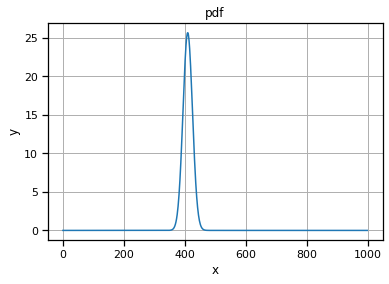

In [6]:
successes = sum(outcomes)
failures = len(outcomes) - successes

# prior parameters
alpha, beta = 1, 1

# calculate posterior distribution, using a beta distribution
posterior = stats.beta(alpha + successes, beta + failures)

# mean and 95% credible interval
mean = posterior.mean()
cr = posterior.interval(0.95)
print(cr)

#posterior distribution for plotting
xs = np.linspace(0, 1, num=1000)
pdf = posterior.pdf(xs)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

### Question 2 Monte Carlo Prediction Using External Packages

In [3]:
!pip install gym

In [4]:
import sys
import gym
import numpy as np
from collections import defaultdict

In [5]:
env = gym.make('Blackjack-v0')

In [6]:
def play_episode(env):
    """
    Plays a single episode with a set policy in the environment given. Records the state, action 
    and reward for each step and returns the all timesteps for the episode.
    """
    episode = []
    state = env.reset()
    while True:
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [7]:
def update_Q(episode, Q,returns_sum, N, gamma=1.0):
    """
    For each time step in the episode we carry out the first visit monte carlo method, checking if this is 
    the first index of this state. Get the discounted reward and add it to the total reward for that 
    state/action pair. Increment the times we have seen this state action pair and finally update the Q values
    """
    
    for s, a, r in episode:
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == s)
            G = sum([x[2]*(gamma**i) for i,x in enumerate(episode[first_occurence_idx:])])
            returns_sum[s][a] += G
            N[s][a] += 1.0
            Q[s][a] = returns_sum[s][a] / N[s][a]

### Monte Carlo Prediction Function

In [8]:

def mc_predict(env, num_episodes, gamma=1.0):

    """
    This is the primary method. Plays through several episodes of the environment. 
    """
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        episode = play_episode(env)

        update_Q(episode, Q, returns_sum, N)
            
    return Q

### Utility functions to plot blackjack values and policy

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
            
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

### Prediction of the policy values for our chosen strategy, for 1000 games

Episode 1000/1000.

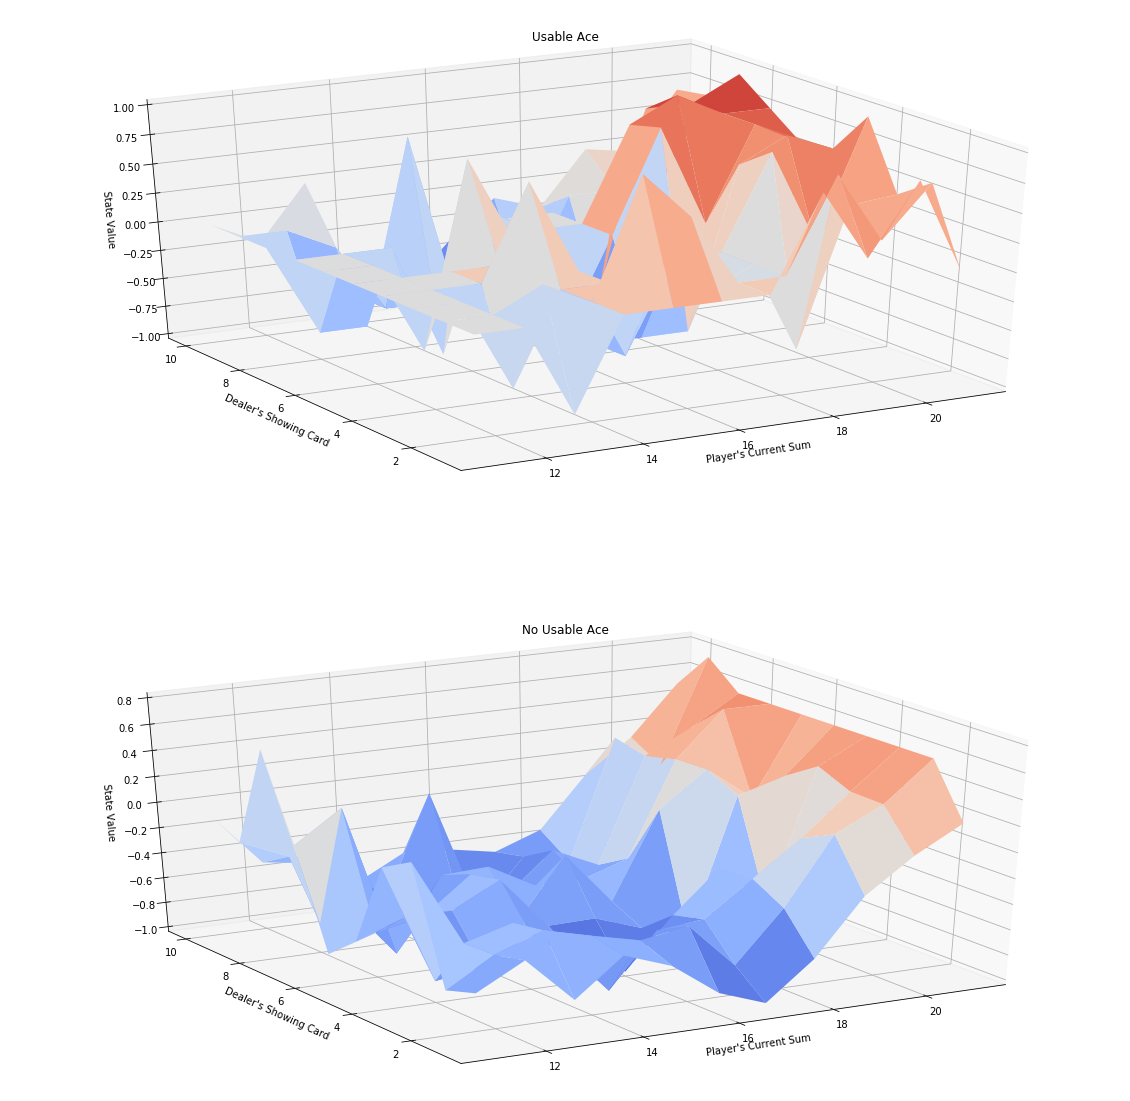

In [10]:
#predict the policy values for our test policy
Q = mc_predict(env, 1000)

#get the state value function for our test policy
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state value functions
plot_blackjack_values(V_to_plot)

### Question 3 Solution Monte Carlo Control

### Control methods for Monte Carlo

In [11]:
def mc_control(env, num_episodes, alpha, gamma=0.9, eps0=1.0, eps_decay=.99999, eps_min=0.05):
    
    # Variable to store all the possible actions of the environment
    nA = env.action_space.n
    
    # Initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    
    # Initialize epsilon
    eps = eps0
    
    # Loop over episodes
    for i_episode in range(1, num_episodes+1):
        
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Recalculate epsilon with a scheduler (a simple decay)
        eps = max(eps*eps_decay, eps_min)
        
        # Run the episode by following the eps-greedy policy
        episode = generate_episode_from_Q(env, Q, eps, nA)
        
        # Update the Q-Table values
        Q = update_Q(env, episode, Q, alpha, gamma)
    
    # Unroll our Q-Table picking the best action at each state (row) to define the found optimal policy
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
        
    return policy, Q

In [12]:
def generate_episode_from_Q(env, Q, eps, nA):
    '''
    Function to generate a MC episode given the environment, the last Q-Table,
    the ratio of exploration and the total number of actions
    Returns: and episode as a 3-tuple of (states, actions, rewards)
    '''
    # Initialize an empty env to run the new episode
    episode = []
    state = env.reset()
    
    # Until terminal state
    while True:
        
        # Generate an action following the policy
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], eps, nA)) if state in Q else env.action_space.sample()
        
        # Perform the 3-tuple for that state - Every visit approach
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        
        # Advance one state 
        state = next_state
        if done:
            break
    
    return episode

In [13]:
def get_probs(Qs, eps, nA):
    '''
    Function that obtains the probabilites corresponding to e-greedy policy
    '''
    # 1 - Initial equal radom probability for every possible action
    policy_s = np.ones(nA) * eps / nA
    
    # 2 - Determine which is the current optimal action for that state
    best_a = np.argmax(Qs)
    
    # 3 - Update (increase) the probability for the optimal action
    policy_s[best_a] = 1 - eps + (eps / nA)
    
    return policy_s

In [14]:
def update_Q(env, episode, Q, alpha, gamma):
    '''
    Function to update the Q-Table after running 1 episode
    '''
    # 1 - Extract the information of the run episode
    states, actions, rewards = zip(*episode)
    
    # 2 - Apply the discount factor
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    
    # 3 - Apply the update function to every Q(s,a) <- Q(s,a) + alpha*[Gt - Q(s,a)]
    for i, s in enumerate(states):
        
        a = actions[i]
        old_Q = Q[s][a]
        Q[s][a] = old_Q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
    return Q

In [15]:
policy, Q = mc_control(env, 10000, 0.1)

Episode 10000/10000.

### Monte Carlo Control Plot for 10000 games

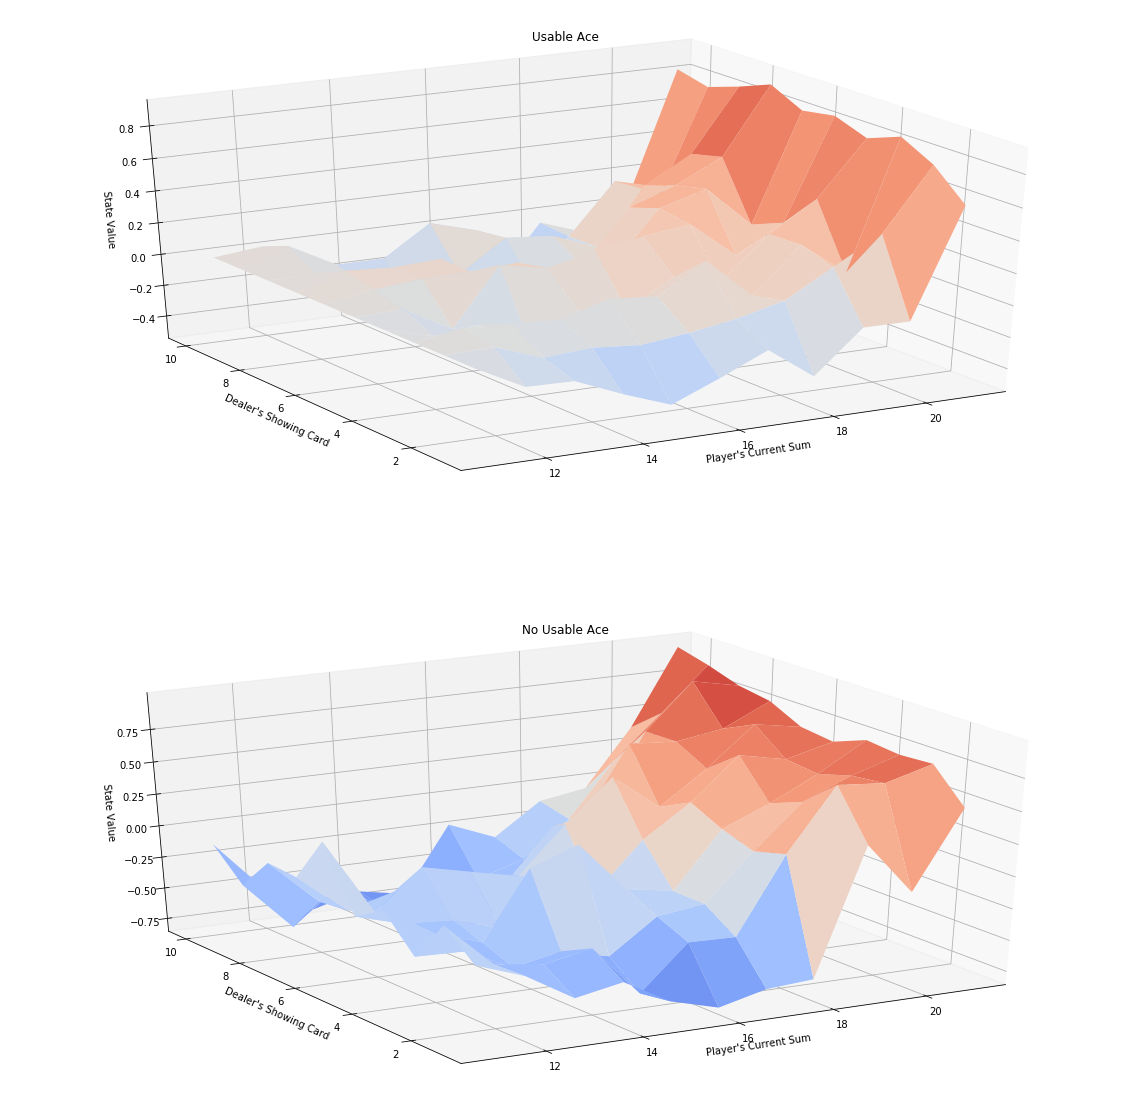

In [16]:
# obtain the corresponding state-value function
V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)

### Policy Plot

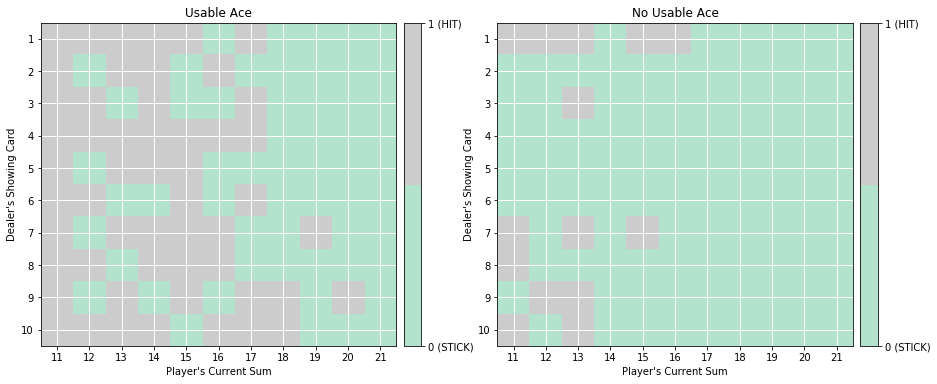

In [17]:
# plot the policy
plot_policy(policy)

<div style="text-align: right">50 points</div>

# 2. Fair or Crooked?

We have a coin and we don't know if it's fair or not. Let's see if it's **fair**, with a little bit of help from Data Science! We will compute a **p-value**, but using **Bayesian estimation** instead of a t-test! This is a ***real*** test statistic, where we visit parallel universes, but we use real Bayesian simulations instead of assuming that the data is *pretty* or that we have a Student-T distribution.

<br />
<center>
<img src = ipynb.images/coin-toss.jpg width = 300 />
</center>

So we toss the coin a thousand times and record the following tosses: 

In [18]:
alltosses = '''TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTT
HTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHH
THTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTT
TTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHT
HTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTH
HHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHH
TTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHH
HHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHT
HHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTHH'''

Use this cell to remove carriage returns:

In [19]:
alltosses = alltosses.replace('\n', '')
alltosses 

'TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTTHTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHHTHTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTTTTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHTHTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTHHHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHHTTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHHHHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHTHHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTH

For the remainder of the problem, let's assume that `T` is modelled as a `0`, and `H` as a `1`.

### Question 1

Based on the `alltosses` roll above, what is the frequency for each side of the coin? Write this down in the cell below in the form of a `pandas` Series, then a `pandas` dataframe. 

Call `sides` your pandas series, and `toss_df` your pandas dataframe.

>**HINT**: Use a python `Counter` to get `T` and `H` frequencies.
```(python)
import pandas as pd
from collections import Counter
sides = pd.Series(...
```

In [20]:
import pandas as pd
from collections import Counter
sides = pd.Series([x for x in alltosses])
tails_frequency = sides.value_counts()
print("Frequency: \n", tails_frequency)

Frequency: 
 H    516
T    484
dtype: int64


Now plot the histogram.

### Frequency Count using Pandas DataFrame

In [21]:
toss_df = pd.DataFrame([x for x in alltosses])
frequency = toss_df[0].value_counts()
print("Frequency", frequency)

Frequency H    516
T    484
Name: 0, dtype: int64


### Histogram

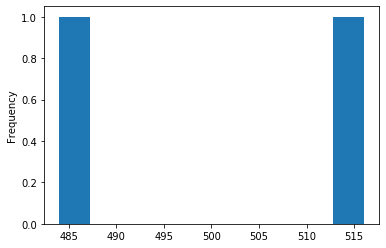

In [22]:
import pandas as pd
from collections import Counter
frequency.plot.hist()

### What statistical probability density profile might you match this distribution with?

### Answer: The above probability density distribution matches Bernoulli Distribution.

Now we ask ourselves: What is the probability of seeing results like this by ***chance***?

### Question 2: Hypothesis testing: Is the apparent effect real, or is it due to chance?  

To answer that question, we formulate two hypotheses: the **null hypothesis H0** is a model of the tosses if the histogram above is due to ***chance***. The **alternate hypothesis HA** is a model of a **crooked** (unfair) coin.

Ideally we should compute the probability of seeing a this empirical histogram effect $E$ under ***both*** hypotheses; that is $P(E \;|\; H0)$ and $P(E \;|\; \text{HA})$.  But formulating $HA$ is not always easy, so in conventional hypothesis testing, we just compute $P(E \;|\; H0)$, which is the **p-value**.  

If the p-value is ***small***, we conclude that our somewhat skewed histogram is unlikely to have occurred by chance, which suggests that the coin is **crooked**.

#### Step 1: Build the null hypothesis
The first step is to get data from our observations and compute a test statistic. The result is some measure of the size of the effect, or **delta**. For example, if we were comparing the mean of two groups, delta is the **difference in the means**. Since we are comparing actual values with expected values, delta is a **chi-squared** statistic: a measure of the distance between the observed and expected values.

#### Step 2: Build a model
The next step is to build a model from our empirical observations and generate simulated data. Then we'll apply the test statistic to the simulated data.

#### Step 3: How many times does the test statistic for the simulated data *exceed the delta*?
The last step is the easiest: Count how many times the test statistic for the simulated data exceeds the delta from the null hypothesis simulation. That's the **p-value**!

To compute a p-value, we have to choose a test statistic that measures how *unexpected* the histogram above is.  The **chi-squared** statistic is a reasonable choice: for each coinc toss we compare the expected frequency and the observed frequency and compute the sum of the squared relative differences.

We have 2 sides to the coin, thus we expect the following frequency for each toss:

In [23]:
len(alltosses)/2

500.0

In [24]:
observed_tosses = [x for x in alltosses]
observed_tosses[:10]

['T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H']

Use a **list comprehension** to get a list of numbers, either 0 or 1, representing our observations. use 0 for `T` and ` for `H`:

In [25]:
observed_tosses_bin = [0 if x == 'T' else 1 for x in alltosses]
observed_tosses_bin[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

Now we define a **Chi squared** statistic to measure the difference between an expected distribution and an observed one:

In [26]:
import numpy as np
def ChiSquared(observed, expected):
    total = 0
    for obs in observed:
        total += obs
    return np.abs(total - expected)

ChiSquared(observed_tosses_bin, len(alltosses)/2)

16.0

For the observed frequencies, the chi-squared statistic is 16.  By itself, this number doesn't mean anything.  We have to ***compare it*** to results from the **null hypothesis**.

We may also need a chi statistic to compare draws from the null hypothesis with draws from the alternate hypothesis. Here it is:

In [27]:
def ChiSquared2(observed, expected):
    total = 0
    both = zip(observed, expected)
    for obs, exp in zip(observed, expected):
        total += np.abs(obs - exp)
    return total

Now we need code that generates *simulated* data. Let's do Bayesian estimation to simulate data with the same statistics as our empirical observations, and then also write a null hypothesis (fair data) simulator.

In the pymc3 simulation below, you will pick your data likelihood function from a list of statistical functions (pdfs). Make sure you pick the right one. My symbol for this function is `???`. Pick the right one and import it from `pymc3`.

In Bayesian estimation, we *also* assign pdfs to the parameter(s). Use the [logistic]() function to assign a pdf to the first parameter of your ??? distribution, and a Normal distribution to the parameter itself. That is a very common practice for any binary variable in ML. We will use a large standard deviation (10) because we have no idea what the parametes should be. 

In [28]:
from pymc3 import Model, Normal, Bernoulli
import theano.tensor as T

def logistic(l):
    return 1 / (1 + T.exp(-l))

with Model() as toss_model:
    mu = Normal('mu', mu=0, sd=10)
    
with toss_model:
    toss_like = Bernoulli('toss_like', p=logistic(mu), observed=observed_tosses_bin)

And now we find a solution for `mu` using pymc3. We run for 1,000 timesteps and we hope we converge!

In [29]:
RANDOM_SEED = 42

In [30]:
from pymc3 import fit

with toss_model: 
    toss_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 698.86: 100%|██████████| 10000/10000 [00:07<00:00, 1295.81it/s]
Finished [100%]: Average Loss = 698.86


We now plot the posterior distribution for `mu` in order to find its most likely value (the mean of the posterior):

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


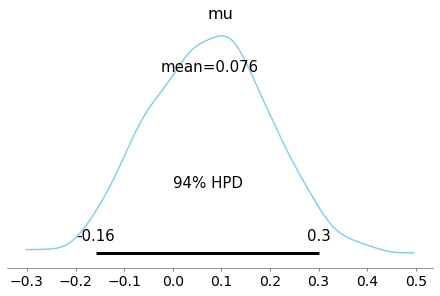

In [31]:
from pymc3 import plot_posterior

plot_posterior(toss_trace[100:], 
                varnames=['mu'],
                color='#87ceeb');

In [32]:
1 / (1 + np.exp(0.076))

0.48100914005407436

Now plot the *simulated* (fake) distribution of coin tosses, based on the statistics of the observed coin tosses. Make sure to import the *same* likelihood pdf you used from pymc3, but this time import it from `scipy.stats.distributions` (note: the captialization of the distribution in scipy may be different):

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


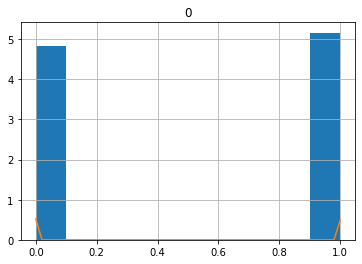

In [33]:
from scipy.stats.distributions import bernoulli
import numpy as np
import matplotlib.pyplot as plt

mu_posterior_mean = 1 / (1 + np.exp(0.076))

pd.DataFrame(observed_tosses_bin).hist(normed=True)
plt.plot(np.linspace(0, 1), bernoulli.pmf(np.linspace(0, 1), mu_posterior_mean))

Does it match the observed distribution?

If it does, we are now ready to simulate, i.e. generate fake coin tosses. This is called **generating posterior predictive checks**:

Posterior predictive checks (PPCs) *validate* your model: You generate data from the model using parameters from draws from the posterior. The `samples` parameter is how many of these simulations you want to run.

Here is one way of doing it (deprecated):

In [34]:
from pymc3 import sample_ppc

with toss_model:
    toss_ppc = sample_ppc(toss_trace, samples=1)

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  after removing the cwd from sys.path.
/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 17.90it/s]


Here is another way (the preferred one):

In [35]:
from pymc3 import sample_posterior_predictive
ppc = sample_posterior_predictive(toss_trace, samples=1, model=toss_model)

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 280.89it/s]


In [36]:
toss_ppc['toss_like'].shape

(1, 1000)

In [37]:
simulated_tosses = toss_ppc['toss_like'][0]
simulated_tosses[:20]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [38]:
faketosses = ''.join([str(int(x)) for x in simulated_tosses])
faketosses

'111110110111100011110011001110101101110110100111110000101111010110100000010011000010001100101101101000101101111001011000111000111011110101110100011111110111100010101110011111010111111110111011011011101100010011011000110101001010100101111111110111111011100110010010100011000100110111000011110100010111101011101111010101011101111100001110101101101000110111101111100100111001110110100111010110010111001010100110011010011101101100000000001101000011101101011111111100010000111110101010000100111100011010000010010110101111011111111100010100100010111010011101011110011101000000101010101001001111001001101000100000100111010011000110110110111111000000000101010101000110100011111010100111111001111111101000011111101111011010111101010000000011110101010111010011000110111110101001000111000111010001010111010101000101001111101111111100010100100011001100100110100101011100010111000001010011110010101110101111000011100101101000111101100111110011101111011010011101101100110101100001000111011101101110110001010011010

In [39]:
len(faketosses)

1000

Now we can simulate our coin (i,e. simulate similar statistics to our heart's content):

In [40]:
def SimulateAlternateHypothesisCoin():
    with toss_model:
        toss_ppc = sample_ppc(toss_trace, samples=1)
    simulated_tosses = toss_ppc['toss_like'][0]
    return ''.join([str(int(x)) for x in simulated_tosses])

And... find a way to simulate a **fair** coin so you get results in the same shape here below:

In [41]:
from random import randrange

def SimulateNullHypothesisCoin(length):
    tosses = ''
    for i in range(length):
        tosses = tosses + str(randrange(0,2,1))
    return tosses

How many `H`s do we get from the alternate hypothesis simulation, and from the null hypothesis simulation?

In [42]:
Counter(SimulateAlternateHypothesisCoin())['1']

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<00:00, 182.65it/s]


560

In [43]:
Counter(SimulateNullHypothesisCoin(1000))['1']

499

Now, we know that the expected frequency for each toss for a fair coin is 1000/2 = 500. This is how we can compare observation to null hypothesis. Although we may want to conclude that the p-value is low with the test below, ***there is still a possibility we got this result by chance***:

In [44]:
expected = 1000/2
threshold = ChiSquared(observed_tosses_bin, expected)
threshold

16.0

This is for a null hypothesis simulation:

In [45]:
expected = 1000/2
null_hypothesis_sim = SimulateNullHypothesisCoin(1000)
null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
chi2

5.0

Let's get a p-value where we compare null hypothesis simulations to our empirical data:

In [46]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000/2.

# observed statistic:
threshold = ChiSquared(observed_tosses_bin, expected)
print(threshold)

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
    if chi2 >= threshold:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

16.0
p-value 0.317


If the the p-value is high, higher than the usual 95% Confidence interval, you cannot reject the null hypothesis!

But our empirical experiment (real observations) threshold could very well have been generated ***by chance***!

Here is a much more powerful and conclusive estimation of our **p-value**: We run a lot of null experiments ***and*** a lot of alternative hypothesis experiments, using our Bayesian model (instead of a single observation as above)! And we can ***count*** all times that our null experiment deviates from the expected threshold (*that is the null chi statistic*), and the times that our alternate hypothesis experiment deviates from the expected threshold (*that is the alternate hypothesis chi statistic*), and we can compare the two chi statistics! 

That tells us in how many universes we observe distributions *different* from the null hypothesis, and allows us to generate a *real* probability that our alternate hypothesis simulations (matching our empirical data) **statistically differ** from null hypothesis simulations!

If the p-value is ***small***, you may conclude that the effect is ***unlikely to have occurred by chance***, which suggests that it is ***real***: The coin is crooked. If the p-value is ***high***, you cannot dismiss the null hypothesis and you need to conclude that the coin is fair and any skew in the statistics is due to *chance*.

In [47]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000 / 2.

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi_null = ChiSquared(null_hypothesis_sim_bin, expected)
    
    alternate_hypothesis_sim = SimulateAlternateHypothesisCoin()
    alternate_hypothesis_sim_bin = [int(x) for x in alternate_hypothesis_sim]
    chi_alternate = ChiSquared(alternate_hypothesis_sim_bin, expected)

    if chi_null >= chi_alternate:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

/Users/aelinadas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<00:00, 210.53it/s]


100%|██████████| 1/1 [00:00<00:00, 265.97it/s]


100%|██████████| 1/1 [00:00<00:00, 304.66it/s]


p-value 0.014


If your p-value is low, there is a *very small* possibility these skewed results are due to chance, so our coin is ***crooked***. If it's high, you cannot conclude and need to accept the null hypothesis.

So, which is it?

That's **hypothesis testing** in a nutshell. All of the classical frequentist tests you learn in classical (non-pythonized and MCMC-ized) statistics class are just ways to compute p-values *efficiently* when computation was expensive. Now that computation is fast and clever algorithms like Metropolis and NUTS are available, Bayesian estimation is the *preferred* way to do statistics, even to compute something like a p-value!

### My p value is low as 0.014 which is less than 0.05, that means the coin is crooked, hence rejecting the Null Hypothesis.